In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Reading Files
df39880 = pd.read_csv('combined/combined_39880_from.csv')
df39878 = pd.read_csv('combined/combined_39878_from.csv')
df24990 = pd.read_csv('combined/combined_24990_from.csv')
df39874 = pd.read_csv('combined/combined_39874_from.csv')
df39693 = pd.read_csv('combined/combined_39693_from.csv')
df39692 = pd.read_csv('combined/combined_39692_from.csv')
df39691 = pd.read_csv('combined/combined_39691_from.csv')
df39689 = pd.read_csv('combined/combined_39689_from.csv')
df39688 = pd.read_csv('combined/combined_39688_from.csv')
df39686 = pd.read_csv('combined/combined_39686_from.csv')

df39685 = pd.read_csv('combined/combined_39685_from.csv')
df39674 = pd.read_csv('combined/combined_39674_from.csv')
df39673 = pd.read_csv('combined/combined_39673_from.csv')
df39671 = pd.read_csv('combined/combined_39671_from.csv')
df39669 = pd.read_csv('combined/combined_39669_from.csv')
df39668 = pd.read_csv('combined/combined_39668_from.csv')
df39667 = pd.read_csv('combined/combined_39667_from.csv')
df39665 = pd.read_csv('combined/combined_39665_from.csv')
df39600 = pd.read_csv('combined/combined_39600_from.csv')
df39599 = pd.read_csv('combined/combined_39599_from.csv')
df39569 = pd.read_csv('combined/combined_39569_from.csv')
df24668 = pd.read_csv('combined/combined_24668_from.csv')
df24572 = pd.read_csv('combined/combined_24572_from.csv')
df24363 = pd.read_csv('combined/combined_24363_from.csv')

call = pd.read_csv('combined/combined_all_device.csv')

# PSI_Readings_with_Weather_2023-01-04_1026
psi_w = pd.read_csv('data/PSI_Readings_with_Weather_2023-01-04_1026.csv')

# Device # (Serial #), Location Name, Empty and Full notification and containers pickup data
hrpu = pd.read_csv('data/Hauler_Response_Pick-Up_2023-01-04_1018.csv')

# Device # (Serial #), Location Name, All "events", Tracks any issues with the devices
events = pd.read_csv('data/Events_2023-01-04_1022.csv')

# Device # (Serial #), Location Name, All "events", Tracks any issues with the devices
dcf = pd.read_csv('data/Device_Compaction_Frequency_2023-01-04_1029.csv')

# Device # (Serial #), Location Name, All "events", Tracks any issues with the devices
dcf2 = pd.read_csv('data/Device_Compaction_Frequency_2023-01-04_1019.csv')

# Device # (Serial #), Location Name, All "events", Tracks any issues with the devices
budw = pd.read_excel('data/BU_Daily_Weights_FY22.xlsx')
budw['Work Order Date'] = budw['Work Order Date'].mask(budw['Work Order Date'].dt.year == 2023, 
                             budw['Work Order Date'] + pd.offsets.DateOffset(year=2022))

# Device Geo Location
dgl = pd.read_csv('data/DeviceGeoLocations.csv')


/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_34341/1823290826.py:41: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv('data/Events_2023-01-04_1022.csv')
/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_34341/1823290826.py:52: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex.
  budw['Work Order Date'] + pd.offsets.DateOffset(year=2022))


In [2]:
budw

,Customer Key,Location,Address,Work Order Date,Material,Tons
0,31903.0,BU #72 - Rafik B Hariri,853 BEACON ST,2021-07-01,Recycling,0.030
1,31950.0,BU #89 - Brownstones,91 BAY STATE RD,2021-07-02,Recycling,0.080
2,31769.0,BU #112B - 949 Comm Ave,36 Cummington Mall,2021-07-06,Recycling,0.567
3,31946.0,BU #99 - College of Fine Arts,120 ASHFORD STREET,2021-07-06,Trash,0.047
4,31786.0,BU #102 - Student Health Services,138 MOUNTFORT ST,2021-07-08,Trash,3.370
...,...,...,...,...,...,...
18169,31771.0,BU #4 - Yawkey Center,100 BAY STATE RD,2021-09-10,Compost,5.520
18170,31771.0,BU #4 - Yawkey Center,100 BAY STATE RD,2021-09-02,Compost,2.780
18171,31771.0,BU #4 - Yawkey Center,100 BAY STATE RD,2021-08-26,Compost,1.900
18172,31771.0,BU #4 - Yawkey Center,100 BAY STATE RD,2021-07-27,Compost,0.930


In [3]:
# Sorted by tons
budw_sorted_tons = budw.groupby('Location').sum('Tons').sort_values(by='Tons', ascending=False)
budw_sorted_tons.head(20)

,Customer Key,Tons
Location,,
BU #4 - Yawkey Center,13822829.0,251.233500
BU #112 - 949 Comm Ave,15250452.0,159.965530
BU #93 - George Sherman Union,7792811.0,156.905500
BU #30 - Blanford,13579390.0,139.460500
BU COMPOST- 700 Comm AVE,7457856.0,125.808315
BU #11 - 100 Ashford,5429030.0,118.507500
BU #82 - Warren Towers,9488765.0,112.843040
BU #92 - Mugar Memorial Library,9937241.0,105.831000
BU #75 - College of Health,12108581.0,102.527000


In [4]:
# Sorted by pickups
budw_sorted_pickups = budw.groupby('Location').size().sort_values(ascending=False)
budw_sorted_pickups

Location
BU #112 - 949 Comm Ave        477
BU #4 - Yawkey Center         433
BU #30 - Blanford             425
BU #2 - Student Village       398
BU #75 - College of Health    379
                             ... 
BU- 815 Albany TEMP             3
BU- Nickerson Event             3
BU- 808 Commonwealth TEMP       2
BU SECURE- 25 Pilgrim           1
BU #120 - 745 Comm Ave          1
Length: 151, dtype: int64

In [5]:
# BU #112 - 949 Comm Ave by material
budw_comm_ave = budw.loc[budw['Location'] == 'BU #112 - 949 Comm Ave']
budw_comm_ave_material = budw_comm_ave.groupby('Material').sum('Tons')
budw_comm_ave_material

,Customer Key,Tons
Material,,
Compost,1950597.0,10.65103
Recycling,9377170.0,86.03950
Trash,3922685.0,63.27500


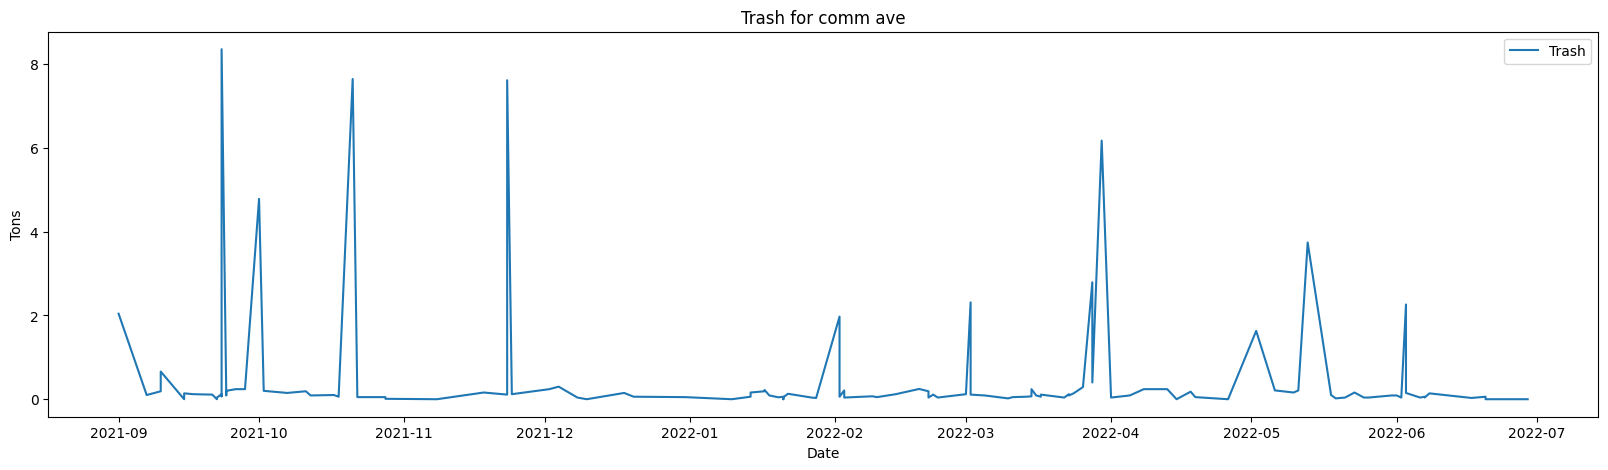

In [7]:
Trash = budw_comm_ave.loc[budw_comm_ave['Material'] == 'Trash']
# apply normalization techniques

# Trash['Tons'] = Trash['Tons']  / Trash['Tons'].abs().max()
  
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.plot(Trash['Work Order Date'], Trash['Tons'],  label='Trash')
plt.title("Trash for comm ave")
plt.xlabel("Date")
plt.ylabel("Tons")
# plt.plot(df39686['readingDtUtz'], df39686['celsius'],  label='Celceus')


plt.legend()


,Customer Key,Location,Address,Work Order Date,Material,Tons
8318,32450.0,BU #112 - 949 Comm Ave,145 BAYSTATE RD,2022-01-31,Recycling,50.0695
1046,32777.0,BU #112 - 949 Comm Ave,191 Bay State Rd,2021-09-03,Recycling,1.0100
882,33086.0,BU #112 - 949 Comm Ave,2 CUMMINGTON ST,2021-08-31,Recycling,0.7400
781,33086.0,BU #112 - 949 Comm Ave,2 Silber Way,2021-08-30,Recycling,0.7400
8300,31950.0,BU #112 - 949 Comm Ave,275 Babcock,2022-01-31,Recycling,0.5065
...,...,...,...,...,...,...
5396,31901.0,BU #112 - 949 Comm Ave,1019 COMMONWEALTH AVE,2021-11-26,Recycling,0.0000
15528,31845.0,BU #112 - 949 Comm Ave,515 Park/100 Mountfort,2022-06-14,Recycling,0.0000
2821,31905.0,BU #112 - 949 Comm Ave,141 CARLTON ST,2021-10-08,Recycling,0.0000
9835,31898.0,BU #112 - 949 Comm Ave,949 Commonwealth Ave,2022-03-01,Recycling,0.0000


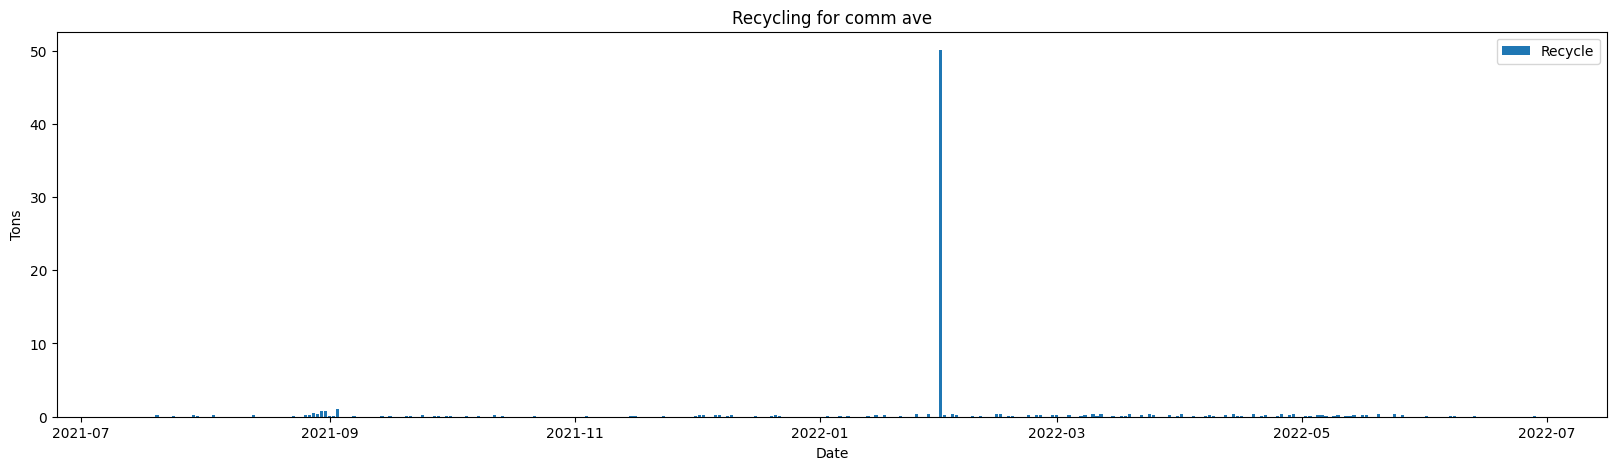

In [9]:
Recycle = budw_comm_ave.loc[budw_comm_ave['Material'] == 'Recycling']
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.bar(Recycle['Work Order Date'], Recycle['Tons'],  label='Recycle')
plt.title("Recycling for comm ave")
plt.xlabel("Date")
plt.ylabel("Tons")
plt.legend()

Recycle.sort_values(by='Tons', ascending=False)


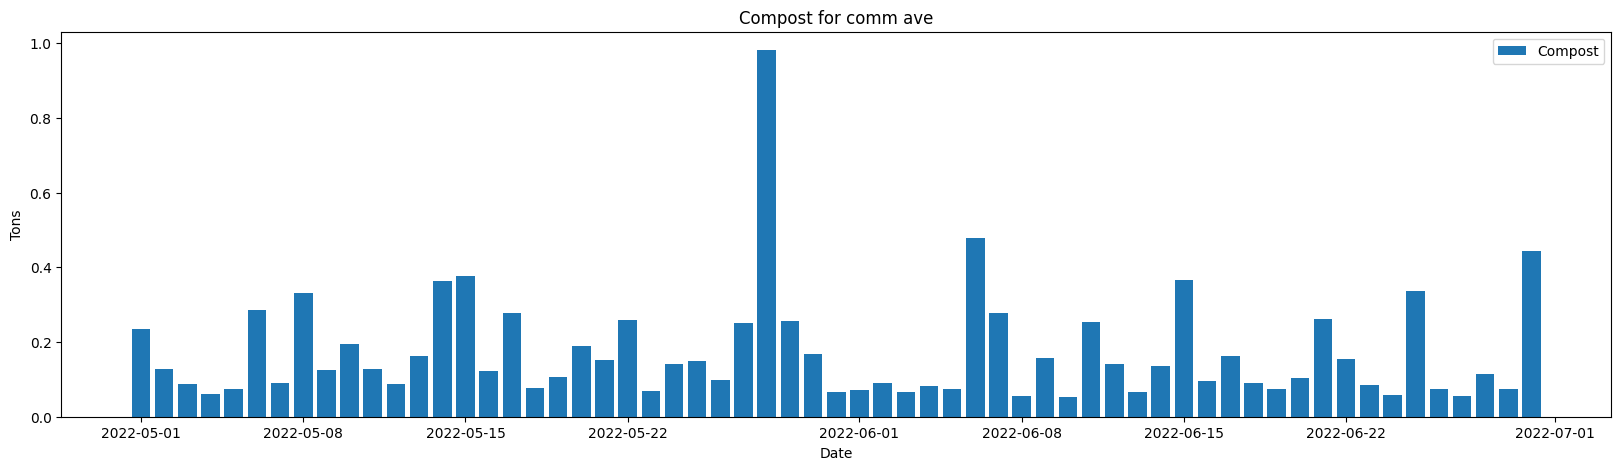

In [11]:

Compost = budw_comm_ave.loc[budw_comm_ave['Material'] == 'Compost']
# Compost['Work Order Date'] = Compost['Work Order Date'].mask(Compost['Work Order Date'].dt.year == 2023, Compost['Work Order Date'] + pd.offsets.DateOffset(year=2022))
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.bar(Compost['Work Order Date'], Compost['Tons'],  label='Compost')
plt.title("Compost for comm ave")
plt.xlabel("Date")
plt.ylabel("Tons")
plt.legend()


In [12]:
# BU #93 - George Sherman Union

budw_gsu = budw.loc[budw['Location'] == 'BU #93 - George Sherman Union']
budw_gsu_material = budw_gsu.groupby('Material').sum('Tons')
budw_gsu_material

# BU #4 - Yawkey Center
budw_YawkerC = budw.loc[budw['Location'] == 'BU #4 - Yawkey Center']
budw_YawkerC_material = budw_YawkerC.groupby('Material').sum('Tons')
budw_YawkerC_material

,Customer Key,Tons
Material,,
Compost,2255741.0,177.4600
Recycling,8252623.0,29.8660
Trash,3314465.0,43.9075


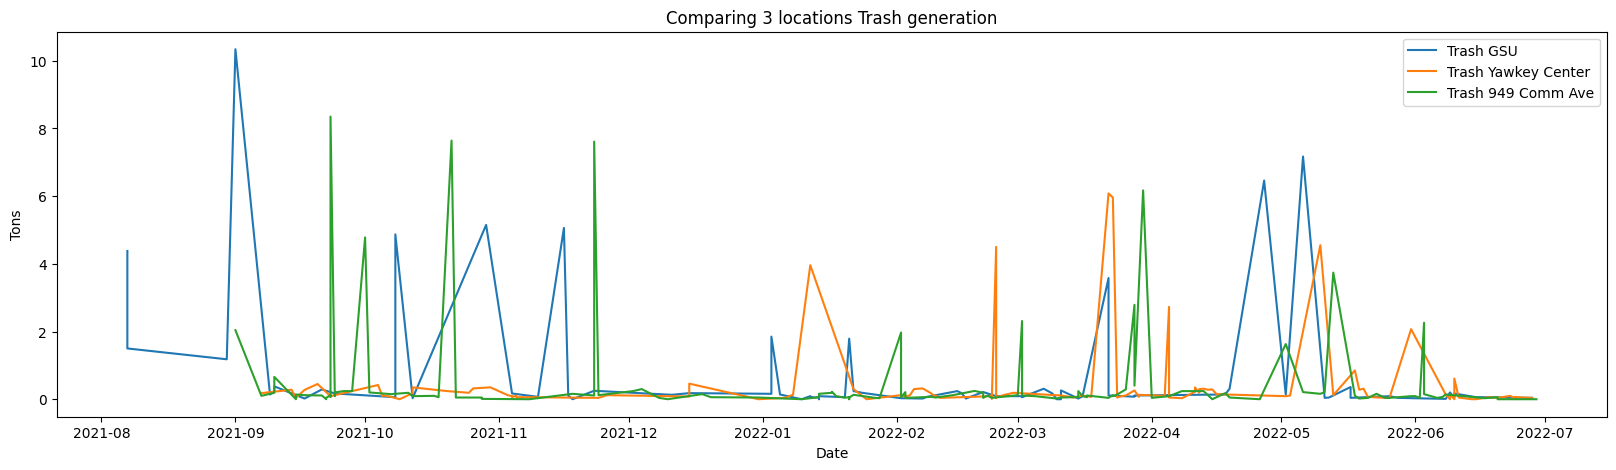

In [14]:
from scipy.stats import pearsonr

TrashGSU = budw_gsu.loc[budw_gsu['Material'] == 'Trash']
TrashYawk = budw_YawkerC.loc[budw_YawkerC['Material'] == 'Trash']

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.plot(TrashGSU['Work Order Date'], TrashGSU['Tons'],  label='Trash GSU')
plt.plot(TrashYawk['Work Order Date'], TrashYawk['Tons'],  label='Trash Yawkey Center')
plt.plot(Trash['Work Order Date'], Trash['Tons'],  label='Trash 949 Comm Ave')
plt.title("Comparing 3 locations Trash generation")
plt.xlabel("Date")
plt.ylabel("Tons")

plt.legend()





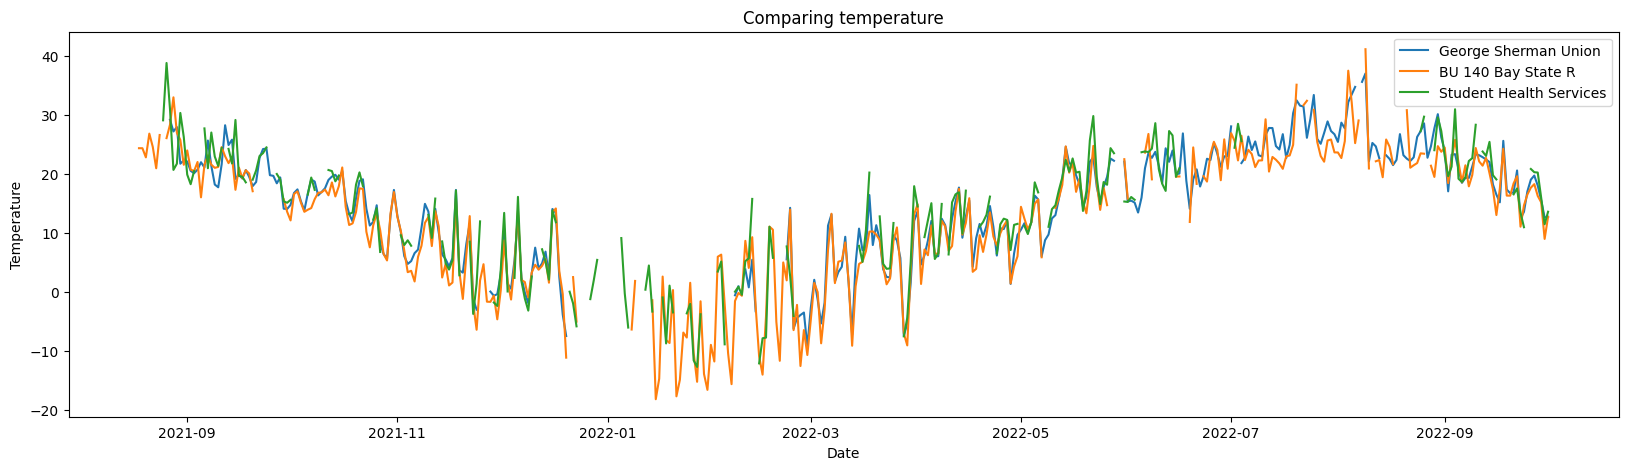

In [3]:
# Comparing temperature at 3 locations
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
df39686

df39686['readingDtUtz'] = pd.to_datetime(df39686['readingDtUtz'])
daily_averages = df39686.groupby(pd.Grouper(key='readingDtUtz', freq='D'), as_index=1).mean()
daily_averages = daily_averages.reset_index()

df39693['readingDtUtz'] = pd.to_datetime(df39693['readingDtUtz'])
daily_averages2 = df39693.groupby(pd.Grouper(key='readingDtUtz', freq='D'), as_index=1).mean()
daily_averages2 = daily_averages2.reset_index()



df39569['readingDtUtz'] = pd.to_datetime(df39569['readingDtUtz'])
daily_averages3 = df39569.groupby(pd.Grouper(key='readingDtUtz', freq='D'), as_index=1).mean()
daily_averages3 = daily_averages3.reset_index()


plt.plot(daily_averages['readingDtUtz'], daily_averages['celsius'],  label='George Sherman Union')
plt.plot(daily_averages2['readingDtUtz'], daily_averages2['celsius'],  label='BU 140 Bay State R')
plt.plot(daily_averages3['readingDtUtz'], daily_averages3['celsius'],  label='Student Health Services')
plt.title("Comparing temperature")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()

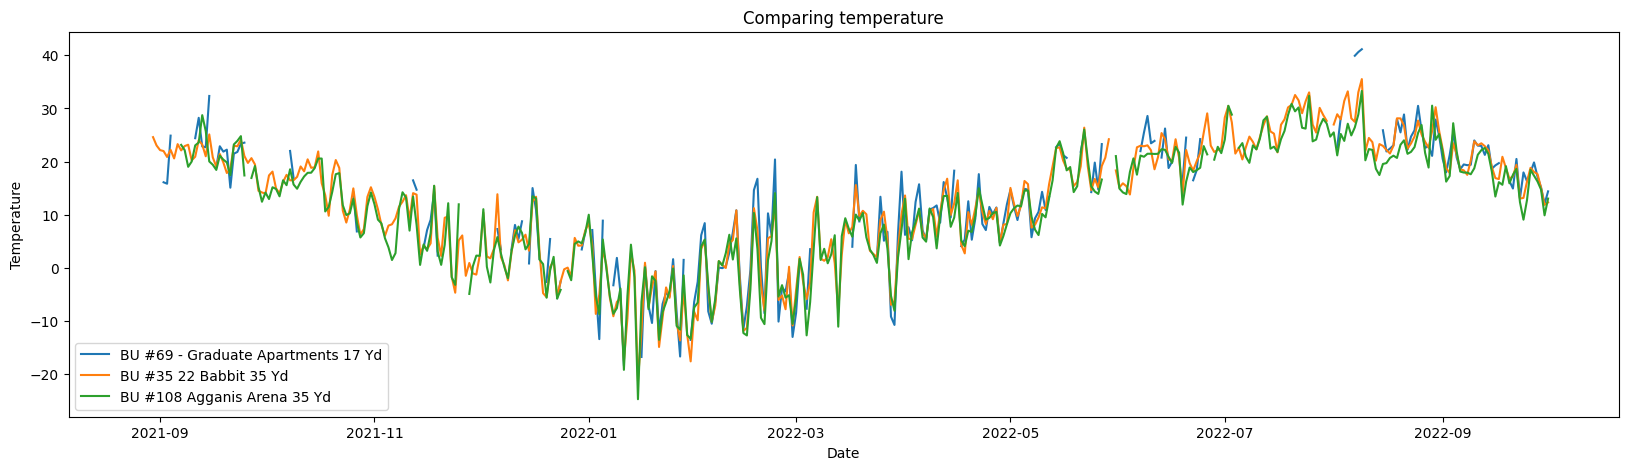

In [5]:
# Comparing temperature at other 3 locations

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)


df39880['readingDtUtz'] = pd.to_datetime(df39880['readingDtUtz'])
daily_averages = df39880.groupby(pd.Grouper(key='readingDtUtz', freq='D'), as_index=1).mean()
daily_averages = daily_averages.reset_index()

df39878['readingDtUtz'] = pd.to_datetime(df39878['readingDtUtz'])
daily_averages2 = df39878.groupby(pd.Grouper(key='readingDtUtz', freq='D'), as_index=1).mean()
daily_averages2 = daily_averages2.reset_index()

df24990['readingDtUtz'] = pd.to_datetime(df24990['readingDtUtz'])
daily_averages3 = df24990.groupby(pd.Grouper(key='readingDtUtz', freq='D'), as_index=1).mean()
daily_averages3 = daily_averages3.reset_index()


plt.plot(daily_averages['readingDtUtz'], daily_averages['celsius'],  label='BU #69 - Graduate Apartments 17 Yd')
plt.plot(daily_averages2['readingDtUtz'], daily_averages2['celsius'],  label='BU #35 22 Babbit 35 Yd')
plt.plot(daily_averages3['readingDtUtz'], daily_averages3['celsius'],  label='BU #108 Agganis Arena 35 Yd')
plt.title("Comparing temperature")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()

/var/folders/3m/qlyn2slj1hlc6p0y780lxt7h0000gn/T/ipykernel_34341/4057043772.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_temp = call.groupby(pd.Grouper(key='readingDtUtz', freq='D'), as_index=1).mean()


,readingDtUtz,valuePsi,celsius,fahrenheit,cluster
0,2021-07-19,328.000000,19.150000,66.470000,4.000000
1,2021-07-20,NaN,NaN,NaN,NaN
2,2021-07-21,NaN,NaN,NaN,NaN
3,2021-07-22,NaN,NaN,NaN,NaN
4,2021-07-23,NaN,NaN,NaN,NaN
...,...,...,...,...,...
435,2022-09-27,578.568707,19.444517,67.000131,2.258503
436,2022-09-28,629.592357,17.347277,63.225099,2.152866
437,2022-09-29,655.612208,14.800754,58.641357,1.472172
438,2022-09-30,693.903448,11.798724,53.237703,0.343103


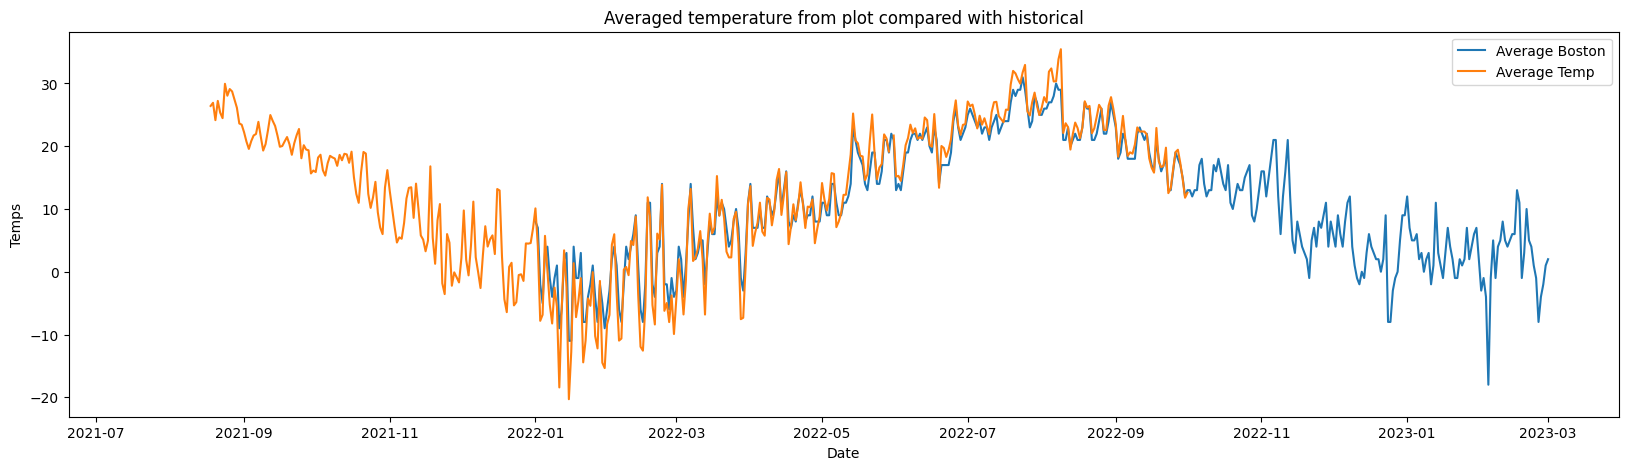

In [11]:
# call
boston_df = pd.read_csv('data/BostonLogan.csv')

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)


call['readingDtUtz'] = pd.to_datetime(call['readingDtUtz'])
average_temp = call.groupby(pd.Grouper(key='readingDtUtz', freq='D'), as_index=1).mean()
average_temp = average_temp.reset_index()

boston_df['DATE'] = pd.to_datetime(boston_df['DATE'])
boston_df['Cels'] = round(((boston_df['TAVG'] - 32) * 5/9), 0)
plt.plot(boston_df['DATE'], boston_df['Cels'],  label='Average Boston')
plt.plot(average_temp['readingDtUtz'], average_temp['celsius'],  label='Average Temp')
plt.title("Averaged temperature from plot compared with historical")
plt.xlabel("Date")
plt.ylabel("Temps")
plt.legend()
average_temp

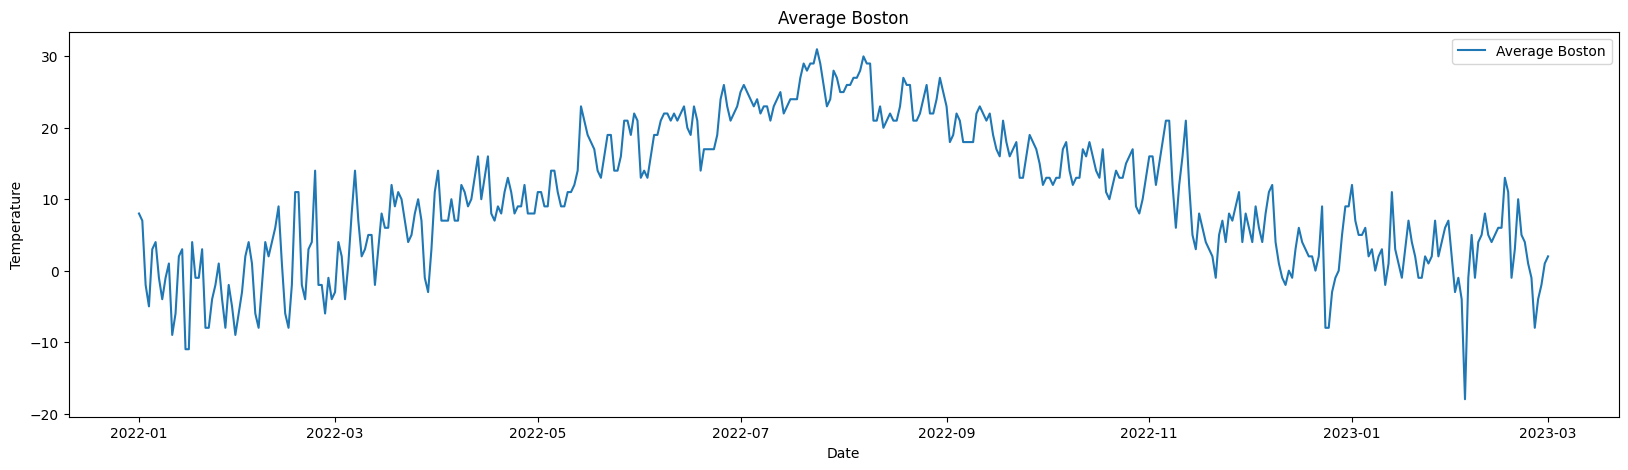

In [8]:
# Temperature from archive

boston_df = pd.read_csv('data/BostonLogan.csv')

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)


boston_df['DATE'] = pd.to_datetime(boston_df['DATE'])
boston_df['Cels'] = round(((boston_df['TAVG'] - 32) * 5/9), 0)
plt.plot(boston_df['DATE'], boston_df['Cels'],  label='Average Boston')
plt.title("Average Boston")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()

Correlation coefficient: 0.11893668357161091


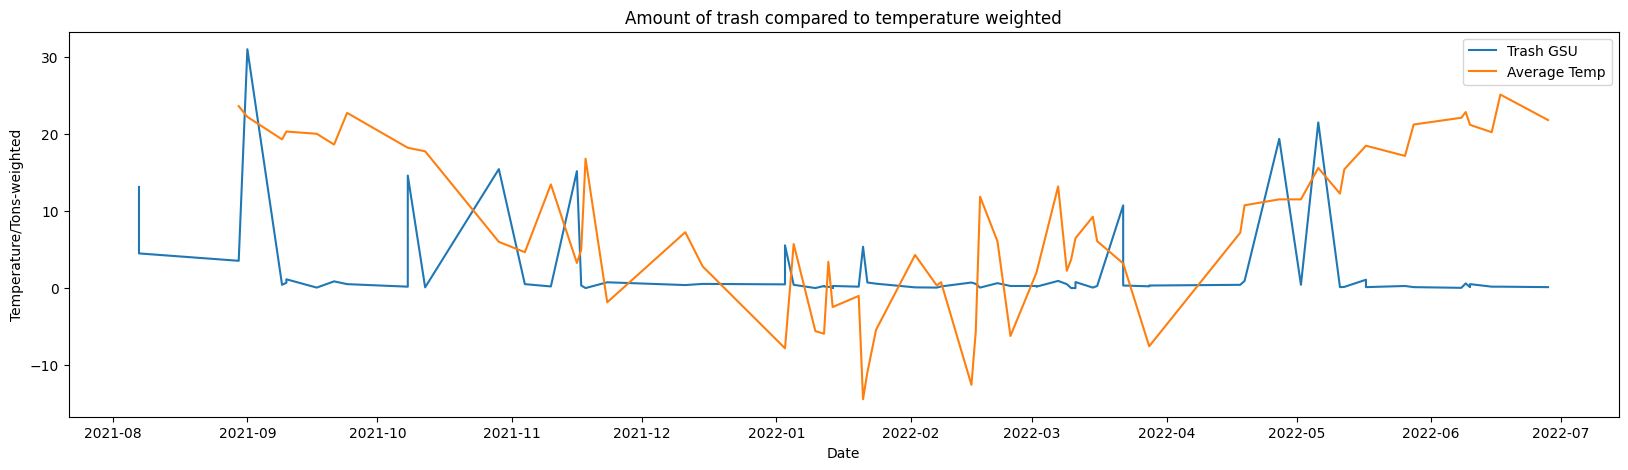

In [21]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

merged = TrashGSU.merge(average_temp,left_on='Work Order Date', right_on='readingDtUtz')
merged

plt.plot(merged['Work Order Date'], merged['Tons']*3,  label='Trash GSU')
plt.plot(merged['readingDtUtz'], merged['celsius'],  label='Average Temp')
# plt.plot(merged['readingDtUtz'], merged['valuePsi']/100,  label='Average PSI')
plt.title("Amount of trash compared to temperature weighted GSU")
plt.xlabel("Date")
plt.ylabel("Temperature/Tons-weighted")
plt.legend()
corr = merged['Tons'].corr(merged['celsius'])

print("Correlation coefficient:", corr)

Correlation coefficient: -0.17200522527145373


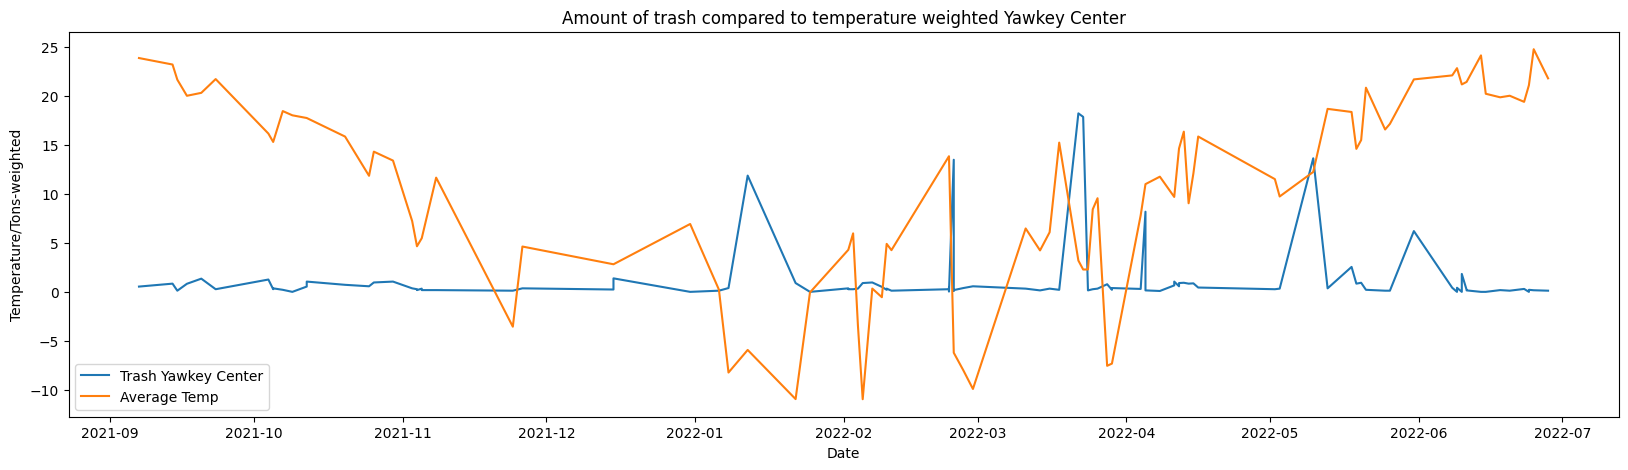

In [23]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

mergedYawk = TrashYawk.merge(average_temp,left_on='Work Order Date', right_on='readingDtUtz')
mergedYawk

plt.plot(mergedYawk['Work Order Date'], mergedYawk['Tons']*3,  label='Trash Yawkey Center')
plt.plot(mergedYawk['readingDtUtz'], mergedYawk['celsius'],  label='Average Temp')
plt.title("Amount of trash compared to temperature weighted Yawkey Center")
plt.xlabel("Date")
plt.ylabel("Temperature/Tons-weighted")

plt.legend()
corr = mergedYawk['Tons'].corr(mergedYawk['celsius'])

print("Correlation coefficient:", corr)

Correlation coefficient: 0.03485458343604092


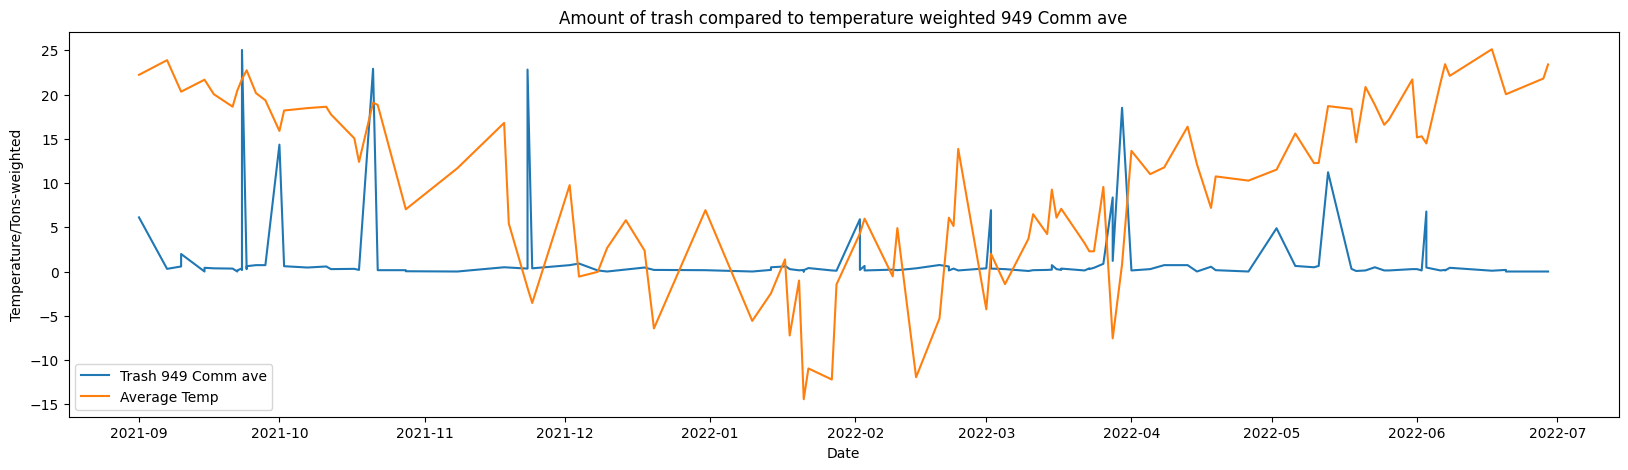

In [25]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

merged949 = Trash.merge(average_temp,left_on='Work Order Date', right_on='readingDtUtz')
merged949

plt.plot(merged949['Work Order Date'], merged949['Tons']*3,  label='Trash 949 Comm ave')
plt.plot(merged949['readingDtUtz'], merged949['celsius'],  label='Average Temp')
plt.title("Amount of trash compared to temperature weighted 949 Comm ave")
plt.xlabel("Date")
plt.ylabel("Temperature/Tons-weighted")
plt.legend()
corr = merged949['Tons'].corr(merged949['celsius'])

print("Correlation coefficient:", corr)


In [26]:

df39686 = df39686.sort_values(by=['readingDtUtz'], ascending=True)
df39686[5900:6005]

,readingDtUtz,valuePsi,celsius,fahrenheit
9171,2022-01-17 07:48:10,2032,0.63,33.134
9172,2022-01-17 07:48:35,2032,0.63,33.134
9173,2022-01-17 07:54:24,504,0.63,33.134
9174,2022-01-17 07:54:51,1232,0.63,33.134
9175,2022-01-17 07:57:10,1168,0.63,33.134
...,...,...,...,...
9271,2022-01-17 11:34:41,1288,0.63,33.134
9272,2022-01-17 11:37:39,512,0.63,33.134
9273,2022-01-17 11:38:14,712,0.63,33.134
9274,2022-02-07 10:29:49,2032,-3.23,26.186


,Customer Key,Location,Address,Work Order Date,Material,Tons
8318,32450.0,BU #112 - 949 Comm Ave,145 BAYSTATE RD,2022-01-31,Recycling,50.0695
1046,32777.0,BU #112 - 949 Comm Ave,191 Bay State Rd,2021-09-03,Recycling,1.0100
882,33086.0,BU #112 - 949 Comm Ave,2 CUMMINGTON ST,2021-08-31,Recycling,0.7400
781,33086.0,BU #112 - 949 Comm Ave,2 Silber Way,2021-08-30,Recycling,0.7400
8300,31950.0,BU #112 - 949 Comm Ave,275 Babcock,2022-01-31,Recycling,0.5065
...,...,...,...,...,...,...
5396,31901.0,BU #112 - 949 Comm Ave,1019 COMMONWEALTH AVE,2021-11-26,Recycling,0.0000
15528,31845.0,BU #112 - 949 Comm Ave,515 Park/100 Mountfort,2022-06-14,Recycling,0.0000
2821,31905.0,BU #112 - 949 Comm Ave,141 CARLTON ST,2021-10-08,Recycling,0.0000
9835,31898.0,BU #112 - 949 Comm Ave,949 Commonwealth Ave,2022-03-01,Recycling,0.0000


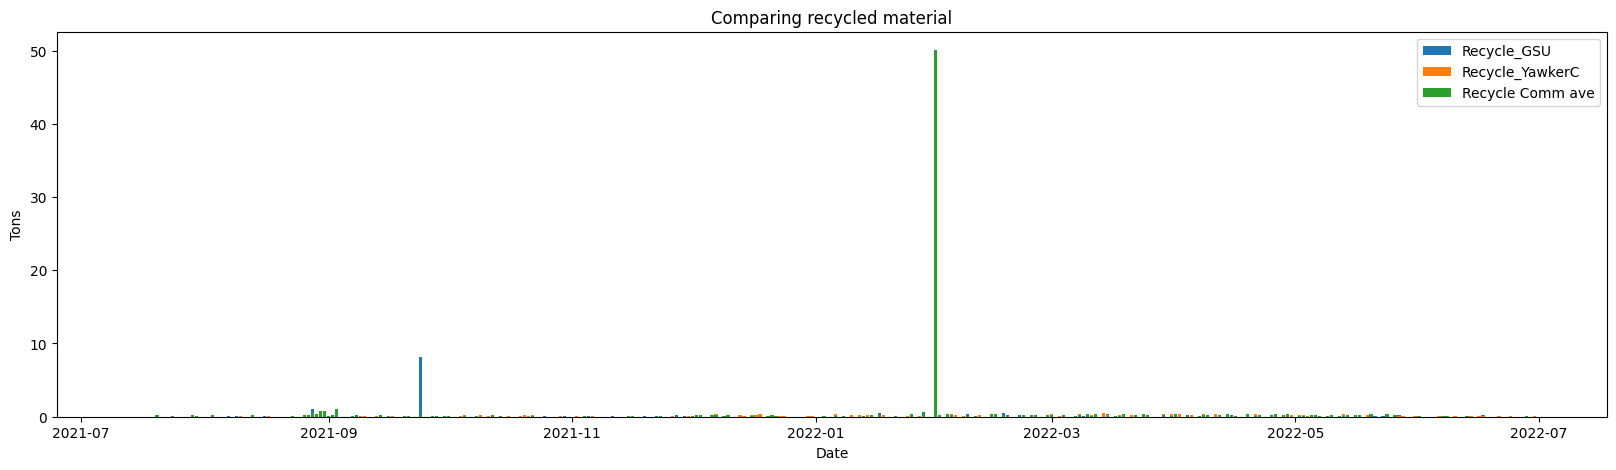

In [28]:
Recycle_GSU = budw_gsu.loc[budw_gsu['Material'] == 'Recycling']
Recycle_Yawk = budw_YawkerC.loc[budw_YawkerC['Material'] == 'Recycling']
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.bar(Recycle_GSU['Work Order Date'], Recycle_GSU['Tons'],  label='Recycle_GSU')
plt.bar(Recycle_Yawk['Work Order Date'], Recycle_Yawk['Tons'],  label='Recycle_YawkerC')
plt.bar(Recycle['Work Order Date'], Recycle['Tons'],  label='Recycle Comm ave')
plt.title("Comparing recycled material")
plt.xlabel("Date")
plt.ylabel("Tons")

plt.legend()

Recycle.sort_values(by='Tons', ascending=False)


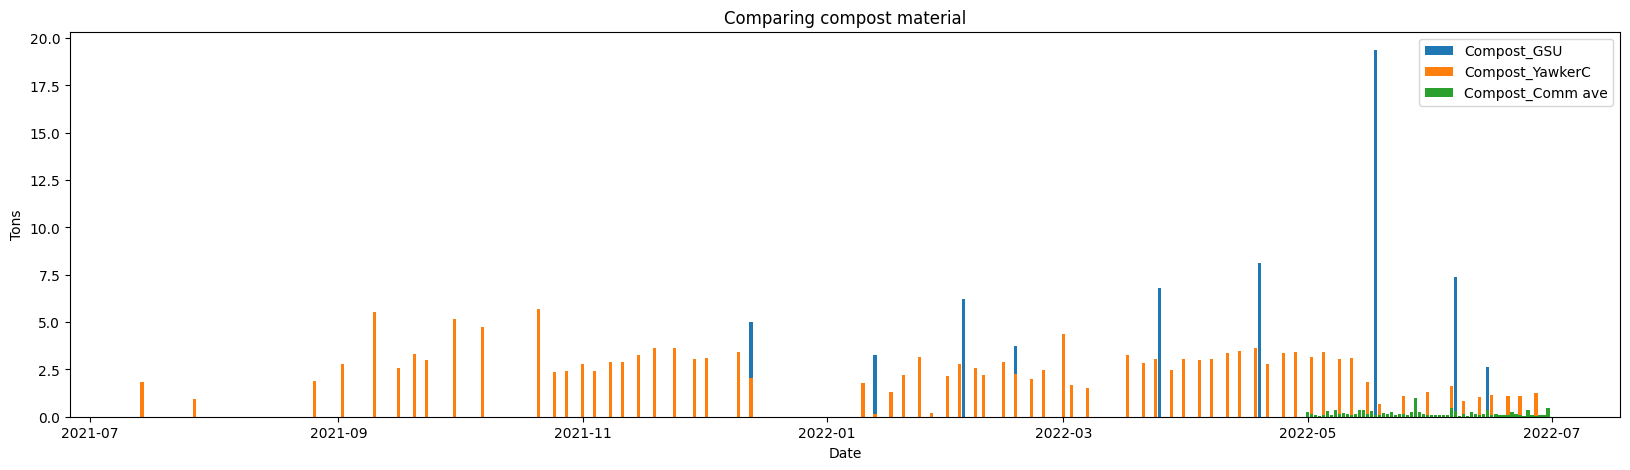

In [29]:

Compost_GSU = budw_gsu.loc[budw_gsu['Material'] == 'Compost']
Compost_Yawk = budw_YawkerC.loc[budw_YawkerC['Material'] == 'Compost']
# Compost['Work Order Date'] = Compost['Work Order Date'].mask(Compost['Work Order Date'].dt.year == 2023, Compost['Work Order Date'] + pd.offsets.DateOffset(year=2022))
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.bar(Compost_GSU['Work Order Date'], Compost_GSU['Tons'],  label='Compost_GSU')
plt.bar(Compost_Yawk['Work Order Date'], Compost_Yawk['Tons'],  label='Compost_YawkerC')
plt.bar(Compost['Work Order Date'], Compost['Tons'],  label='Compost_Comm ave')
plt.title("Comparing compost material")
plt.xlabel("Date")
plt.ylabel("Tons")
plt.legend()


In [30]:
dgl

,Account,Site,Device,Serial No.,Device No.,Address,Latitude,Longitude
0,Boston University,BU 140 Bay State Rd,140 Bay State,31170,39693,"140 Bay State Rd Boston University, Boston, MA...",42.350151,-71.098259
1,Boston University,BU #102 Student Health Services,BU #102 Student Health Services 35 Yd,31203,39569,"881 Commonwealth Avenue , Boston, MA, 02215, US",42.351386,-71.115519
2,Boston University,BU #105 Kilachand Hall,BU #105 Kilachand Hall 20 Yd,31177,39668,"91 Bay State Rd , Boston, MA, 02215, US",42.350315,-71.097026
3,Boston University,BU #108 Agganis Arena,BU #108 Agganis Arena 35 Yd,30851,24990,"925 Commonwealth Avenue , Boston, MA, 02215, US",42.352223,-71.117730
4,Boston University,BU #18 - Warren Hall,BU #18 - Warren Hall 20 Yd,30946,24572,"14 Buswell St , Boston, MA, 02215, US",42.347764,-71.104308
5,Boston University,BU #2 Student Village,BU #2 Student Village 35 Yd,31178,39669,"10 Buick St , Boston, MA, 02215, US",42.352233,-71.115684
6,Boston University,BU #35 22 Babbit,BU #35 22 Babbit 35 Yd,31183,39878,"22 Babbitt St , Boston, MA, 02215, US",42.349190,-71.106085
7,Boston University,BU #38 Life Sciences,BU #38 Life Sciences 20 Yd,31201,39600,"24 Cummington Mall , Boston, MA, 02215, US",42.348365,-71.101590
8,Boston University,BU #4 Yawkey,BU #4 Yawkey Center 15 Yd,31182,39673,"100 Bay State Rd , Boston, MA, 02215, US",42.349763,-71.097967
9,Boston University,BU #4 Yawkey,BU #4 Yawkey Center Org 15 Yd,30845,24950,"100 Bay State Rd , Boston, MA, 02215, US",42.349763,-71.097967


In [31]:
df39686


,readingDtUtz,valuePsi,celsius,fahrenheit
4513,2021-08-27 12:56:43,744,23.41,74.138
4514,2021-08-27 12:57:14,672,23.41,74.138
4515,2021-08-27 13:00:13,664,23.41,74.138
4516,2021-08-27 13:00:44,632,23.41,74.138
4517,2021-08-27 13:04:31,664,23.41,74.138
...,...,...,...,...
9103,2022-10-01 20:52:00,984,13.75,56.750
9104,2022-10-01 21:54:31,984,13.75,56.750
9105,2022-10-01 21:55:02,944,13.75,56.750
9106,2022-10-01 21:57:08,896,13.75,56.750
